# EDA 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 2124 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2103 non-null   float64
 1   AC

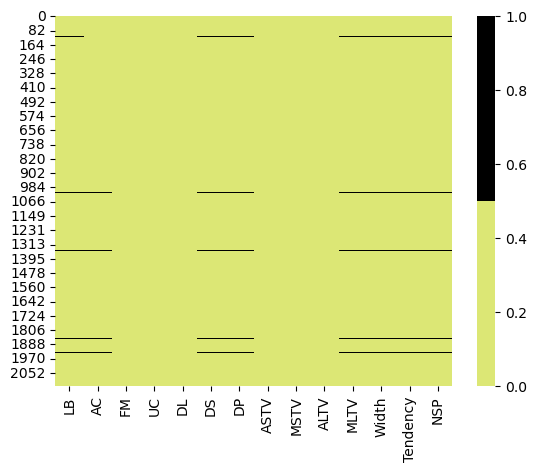

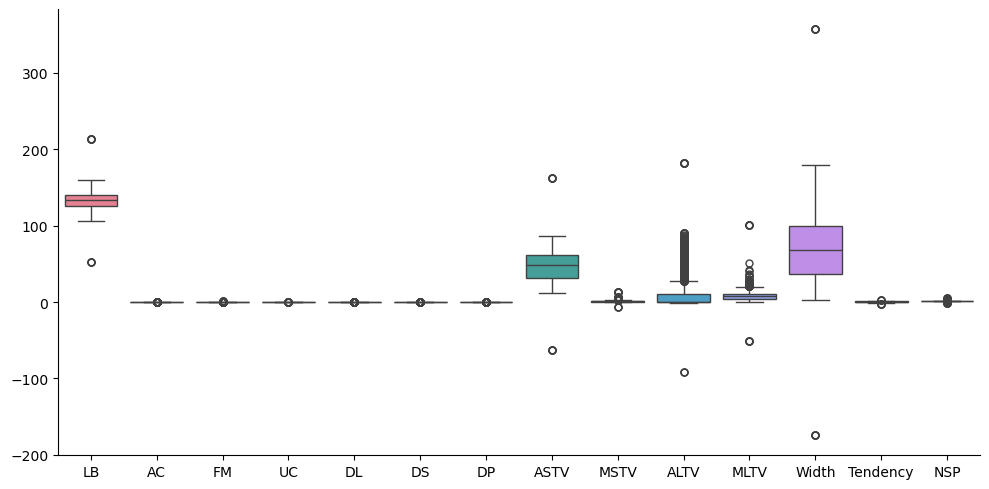

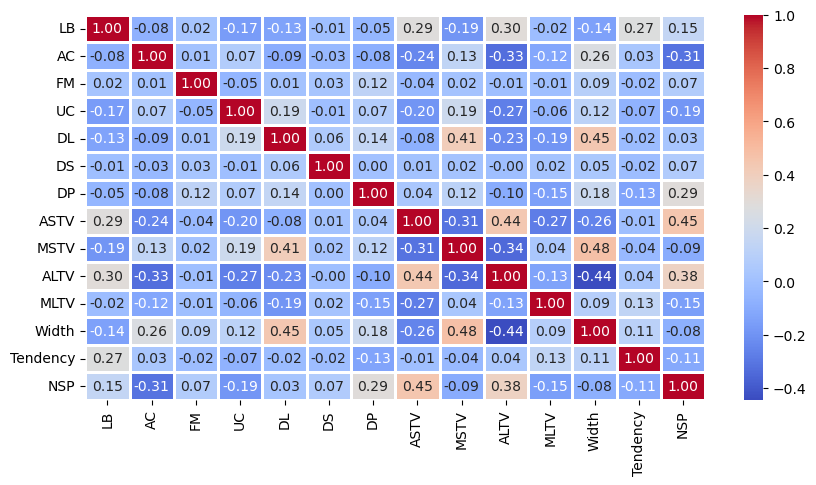

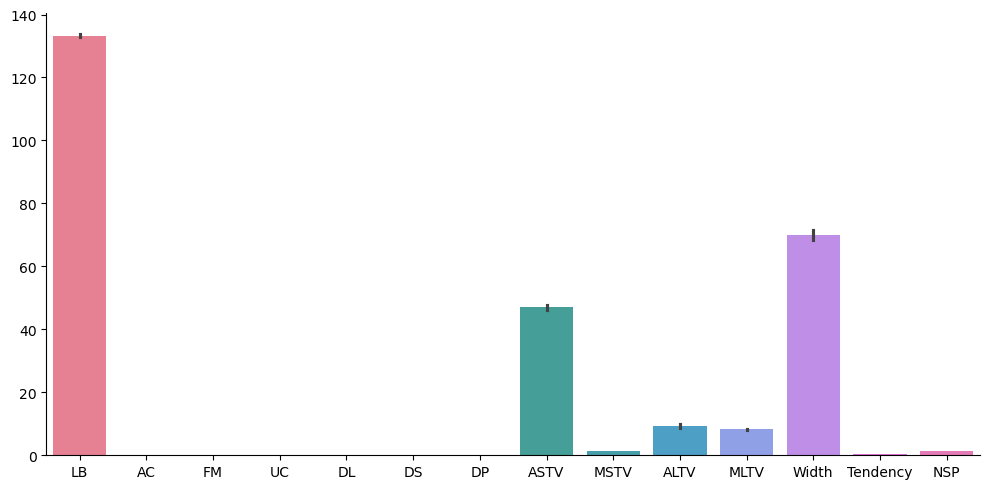

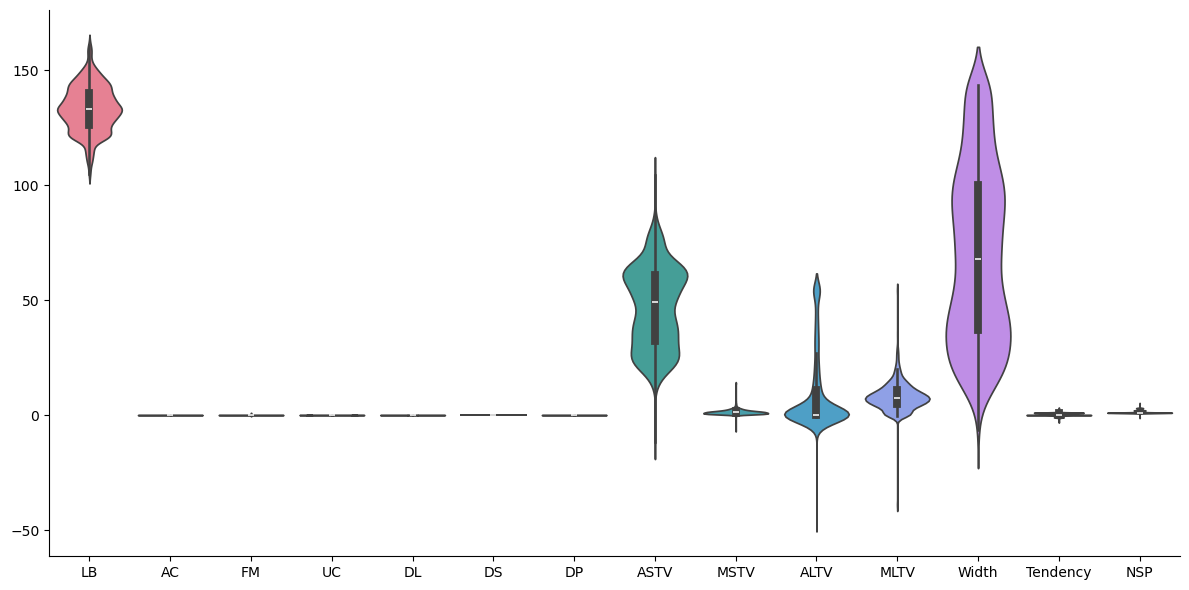

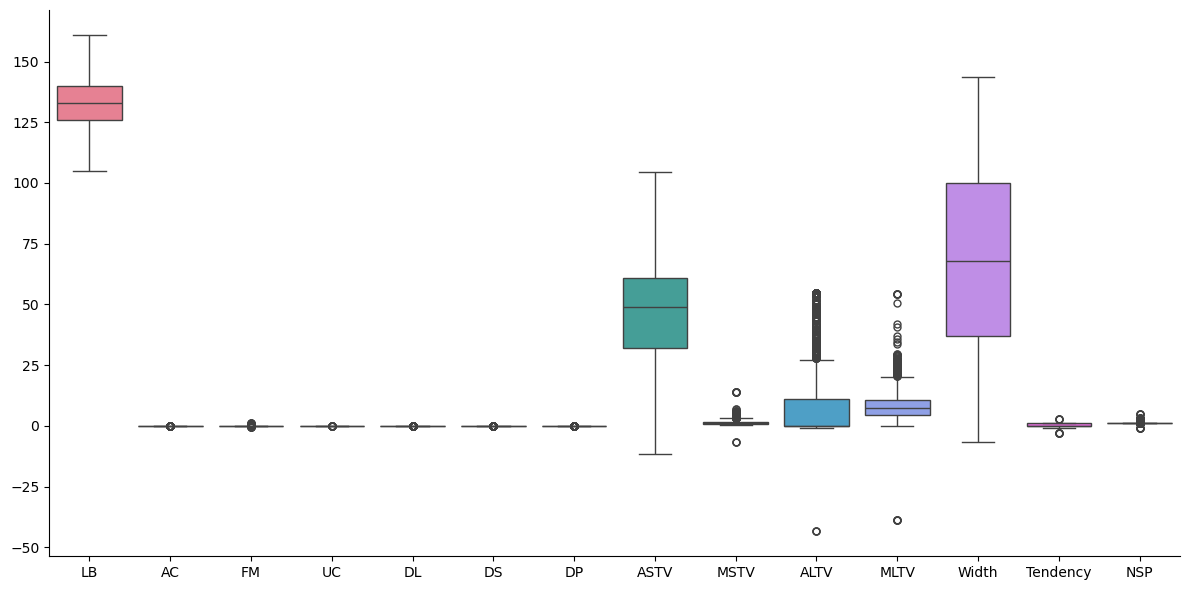

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Imoprt DataSet
ctg=pd.read_csv('Cardiotocographic.csv')
# Evaluating the data
ctg.shape
ctg.columns
ctg.info()
ctg.describe()
ctg.head(4)
ctg['AC'].nunique()
ctg2=ctg.copy()
# Check for duplicates
ctg2[ctg2.duplicated()]
# Drop duplicates
ctg2.drop_duplicates(inplace=True)
ctg2.info()
ctg2.describe()
print(ctg2.isnull().sum())
# Check for NUll values in data
fig_size=figsize=(1.5,1.5)
colour=['#dce775','#000000']
pal=sns.color_palette(colour)
sns.heatmap(ctg2.isnull(),fmt='.2g',cmap=pal )
plt.show()
# Adjusting Null values by taking average
ctg2.fillna(
    {
    'LB':ctg2['LB'].mean(),
    'AC':ctg2['AC'].mean(),
    'DS':ctg2['DS'].mean(),
    'DP':ctg2['DP'].mean(),
    'MLTV':ctg2['MLTV'].mean(),
    'Width':ctg2['Width'].mean(),
    'Tendency':ctg2['Tendency'].mean(),
    'NSP':ctg2['NSP'].mean(), 
    } ,inplace=True
)
#Cross check for missed values
ctg2.isnull().sum()
# Plot cleaned and prepared data for further analysis 
sns.catplot(data=ctg2,kind='box',height=5,aspect=2)
plt.show()
#Checking for Outliers through BOXPLOT [LB,ASTV,ALTV,MLTV and Width]
Q1=ctg2['LB'].quantile(0.25)
Q3=ctg2['LB'].quantile(0.75)
IQR_LB=Q3-Q1
IQR_LB
Ulimit=Q3+1.5*IQR_LB
Llimit=Q1-1.5*IQR_LB
ctg2['LB']=ctg2['LB'].apply(lambda x :Ulimit if x > Ulimit else x)
ctg2['LB']=ctg2['LB'].apply(lambda x :Llimit if x <= Llimit else x)

Q1=ctg2['ASTV'].quantile(0.25)
Q3=ctg2['ASTV'].quantile(0.75)
IQR=Q3-Q1
Ulimit=Q3+1.5*IQR
Llimit=Q1-1.5*IQR
ctg2['ASTV']=ctg2['ASTV'].apply(lambda x : Ulimit if x > Ulimit else x)
ctg2['ASTV']=ctg2['ASTV'].apply(lambda x : Llimit if x <= Llimit else x)

Q1=ctg2['ALTV'].quantile(0.25)
Q3=ctg2['ALTV'].quantile(0.75)
IQR_AC=Q3-Q1
Ulimit=Q3+1.5*IQR
Llimit=Q1-1.5*IQR
ctg2['ALTV']=ctg2['ALTV'].apply(lambda x : Ulimit if x > Ulimit else x)
ctg2['ALTV']=ctg2['ALTV'].apply(lambda x : Llimit if x <= Llimit else x)

Q1=ctg2['MLTV'].quantile(0.25)
Q3=ctg2['MLTV'].quantile(0.75)
IQR_AC=Q3-Q1
Ulimit=Q3+1.5*IQR
Llimit=Q1-1.5*IQR
ctg2['MLTV']=ctg2['MLTV'].apply(lambda x : Ulimit if x > Ulimit else x)
ctg2['MLTV']=ctg2['MLTV'].apply(lambda x : Llimit if x <= Llimit else x)

Q1=ctg2['Width'].quantile(0.25)
Q3=ctg2['Width'].quantile(0.75)
IQR_AC=Q3-Q1
Ulimit=Q3+1.5*IQR
Llimit=Q1-1.5*IQR
ctg2['Width']=ctg2['Width'].apply(lambda x : Ulimit if x > Ulimit else x)
ctg2['Width']=ctg2['Width'].apply(lambda x : Llimit if x <= Llimit else x)

# Visuvalization after filtering all outliers
# Heat Map
plt.figure(figsize=(10,5))
sns.heatmap(ctg2.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=2,)
plt.show()
#Bar Graph
sns.catplot(ctg2,kind='bar',height=5,aspect=2)
plt.show()
# Violin plot
sns.catplot(ctg2,kind='violin',height=6,aspect=2)
plt.show()
# Box Plot
sns.catplot(ctg2,kind='box',height=6,aspect=2)
plt.show()

#### Insights
            1.CTG is a test used to monitor Fetal heart rate and uteraus contraction during pregnancy and at delivery times.
            2.There is no any corelation between variable to variable.
            3.So,that this data set perform well in further usage.
            4.FHR,ASTV,ALTV and Width have noticeable distribution.
            5.While other are flat and surrounded by zero. which mean they are tightly clustered.
            6.Many of outliers are around LB,ASTV,ALTV and Width are removed and ploted in Box plot(2)
            7.Finally,From all this 14 Variables only 5 to 7 are performing well in visuvalization.

#### Summary:
            1.Certain variables (Width, ASTV, LB) have more variability and potential influence over the dataset.
            2.Some variables (AC, FM, UC, DL, DS, DP) are almost constant and might not contribute much to differentiation.
            3.The dataset contains a mix of tightly clustered and widely distributed values, which might be useful in feature selection
            for modeling.